In [2]:
import numpy as np
import pandas as pd
import os
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot
%matplotlib inline
pd.set_option('max_columns', 500)

for file in os.listdir('data/DataFiles/')[:-1]:
    df = pd.read_csv('data/DataFiles/' + file)
    print('File: {} / # of rows: {} / columns: {}'.format(file, len(df), df.columns))

File: Cities.csv / # of rows: 404 / columns: Index(['CityID', 'City', 'State'], dtype='object')
File: Conferences.csv / # of rows: 51 / columns: Index(['ConfAbbrev', 'Description'], dtype='object')
File: ConferenceTourneyGames.csv / # of rows: 4563 / columns: Index(['Season', 'ConfAbbrev', 'DayNum', 'WTeamID', 'LTeamID'], dtype='object')
File: GameCities.csv / # of rows: 43696 / columns: Index(['Season', 'DayNum', 'WTeamID', 'LTeamID', 'CRType', 'CityID'], dtype='object')
File: NCAATourneyCompactResults.csv / # of rows: 2117 / columns: Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT'],
      dtype='object')
File: NCAATourneyDetailedResults.csv / # of rows: 981 / columns: Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAs

In [17]:
teams = pd.read_csv('data/DataFiles/teams.csv')
teams[teams['TeamName']=='Syracuse']

,TeamID,TeamName,FirstD1Season,LastD1Season
292,1393,Syracuse,1985,2018


In [109]:
reg_season = pd.read_csv('data/DataFiles/RegularSeasonDetailedResults.csv')
massey = pd.read_csv('data/MasseyOrdinals.csv')

In [110]:
syr_results = reg_season[(reg_season['WTeamID'] == 1393) | (reg_season['LTeamID'] == 1393)]

In [111]:
massey_pivot = pd.pivot_table(massey, 
                              'OrdinalRank', 
                              index=['Season', 'RankingDayNum', 'TeamID'], 
                              columns = 'SystemName').reset_index()
massey_pivot.head()

SystemName,Season,RankingDayNum,TeamID,7OT,ACU,ADE,AP,ARG,AUS,BBT,BCM,BD,BIH,BKM,BLS,BNM,BOB,BOW,BP5,BPI,BRZ,BUR,BWE,CJB,CMV,CNG,COL,CPA,CPR,CRO,CRW,CTL,D1A,DAV,DC,DC2,DCI,DDB,DES,DII,DOK,DOL,DUN,DWH,EBB,EBP,ECK,ENT,ERD,ESR,FAS,FMG,FSH,GC,GRN,GRS,HAS,HAT,HER,HKB,HKS,HOL,HRN,IMS,INP,ISR,JCI,JEN,JNG,JON,JRT,KBM,KEL,KLK,KMV,KOS,KPI,KPK,KRA,LMC,LOG,LYD,LYN,MAS,MB,MCL,MGY,MIC,MKV,MOR,MPI,MSX,MUZ,MvG,NOL,NOR,OCT,OMY,PEQ,PGH,PH,PIG,PKL,PMC,POM,PPR,PRR,PTS,RAG,REI,REN,REW,RIS,RM,ROG,ROH,RPI,RSE,RSL,RT,RTB,RTH,RTP,RTR,SAG,SAP,SAU,SCR,SE,SEL,SFX,SGR,SIM,SMN,SMS,SP,SPR,SPW,STF,STH,STR,STS,TBD,TMR,TOL,TPR,TRK,TRP,TRX,TSR,TW,UCS,UPS,USA,WIL,WLK,WMR,WOB,WOL,WTE,YAG,ZAM
0,2003,35,1102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003,35,1103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2003,35,1104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2003,35,1105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,314.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2003,35,1106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,260.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
massey_cleaned = massey_pivot.sort_values(['Season', 'TeamID', 'RankingDayNum']).fillna(method='ffill')

In [113]:
syr = pd.merge(syr_results, massey_cleaned, left_on=['WTeamID', 'DayNum', 'Season'], right_on=['TeamID', 'RankingDayNum', 'Season'], how='left')

In [114]:
syr = pd.merge(syr, massey_cleaned, left_on=['LTeamID', 'DayNum', 'Season'], right_on=['TeamID', 'RankingDayNum', 'Season'], how='left')

In [115]:
rankings = [rank for rank in massey_cleaned.columns if not any(y in rank for y in ('TeamID', 'Season', 'RankingDayNum'))]

for i in rankings:
    syr[i] = np.where(syr[i + '_x'].isnull(), syr[i + '_y'], syr[i + '_x'])

In [119]:
drops = [col for col in syr.columns if any(y in col for y in ('_x', '_y'))]

syr.drop(drops, axis=1).head(10)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,7OT,ACU,ADE,AP,ARG,AUS,BBT,BCM,BD,BIH,BKM,BLS,BNM,BOB,BOW,BP5,BPI,BRZ,BUR,BWE,CJB,CMV,CNG,COL,CPA,CPR,CRO,CRW,CTL,D1A,DAV,DC,DC2,DCI,DDB,DES,DII,DOK,DOL,DUN,DWH,EBB,EBP,ECK,ENT,ERD,ESR,FAS,FMG,FSH,GC,GRN,GRS,HAS,HAT,HER,HKB,HKS,HOL,HRN,IMS,INP,ISR,JCI,JEN,JNG,JON,JRT,KBM,KEL,KLK,KMV,KOS,KPI,KPK,KRA,LMC,LOG,LYD,LYN,MAS,MB,MCL,MGY,MIC,MKV,MOR,MPI,MSX,MUZ,MvG,NOL,NOR,OCT,OMY,PEQ,PGH,PH,PIG,PKL,PMC,POM,PPR,PRR,PTS,RAG,REI,REN,REW,RIS,RM,ROG,ROH,RPI,RSE,RSL,RT,RTB,RTH,RTP,RTR,SAG,SAP,SAU,SCR,SE,SEL,SFX,SGR,SIM,SMN,SMS,SP,SPR,SPW,STF,STH,STR,STS,TBD,TMR,TOL,TPR,TRK,TRP,TRX,TSR,TW,UCS,UPS,USA,WIL,WLK,WMR,WOB,WOL,WTE,YAG,ZAM
0,2003,10,1272,70,1393,63,N,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003,20,1393,81,1434,66,H,0,25,58,7,18,24,35,11,26,19,13,10,4,18,23,63,4,18,16,23,17,26,13,20,10,3,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2003,29,1393,98,1159,68,H,0,35,63,8,13,20,32,12,31,23,13,10,10,11,26,75,10,27,6,8,19,21,17,16,6,0,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2003,32,1393,85,1165,62,H,0,30,61,5,17,20,30,14,33,21,13,12,7,15,25,69,9,30,3,9,16,21,18,13,8,1,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2003,36,1393,92,1422,65,H,0,36,70,6,11,14,20,18,22,17,8,12,11,10,25,58,7,20,8,11,13,18,17,20,3,2,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

To Do:
- Concatenate season information (pts score, etc)
- Try stacking
    - Tournament seed model
    - Rankings model
    - Season stats model
    - Location model?

## Read in data

In [21]:
df_tour = pd.read_csv('data/DataFiles/NCAATourneyCompactResults.csv')
df_seeds = pd.read_csv('data/DataFiles/NCAATourneySeeds.csv')
df_massey = pd.read_csv('data/MasseyOrdinals.csv')

## Create training and test set

In [23]:
df_tour.drop(['DayNum', 'WScore', 'LScore', 'WLoc', 'NumOT'], inplace=True, axis=1)

# Create dataframe of wins (seasons since 2002)
df_tour_wins = pd.DataFrame()
df_tour_wins = df_tour[df_tour['Season'] > 2002]
df_tour_wins['Result'] = 1

# Create dataframe of losses (seasons since 2002)
df_tour_losses = pd.DataFrame()
df_tour_losses = df_tour[df_tour['Season'] > 2002]
df_tour_losses = df_tour.rename(columns={
    'WTeamID': 'LTeamID',
    'LTeamID': 'WTeamID',
})
df_tour_losses['Result'] = 0

df_tourney_full = pd.concat([df_tour_wins, df_tour_losses])
df_tourney_full.head()

/Users/djedamski/.pyenv/versions/3.5.3/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,LTeamID,Result,Season,WTeamID
1136,1411,1,2003,1421
1137,1436,1,2003,1112
1138,1272,1,2003,1113
1139,1166,1,2003,1141
1140,1301,1,2003,1143


In [24]:
X_train, X_test, y_train, y_test = train_test_split(df_tourney_full, df_tourney_full['Result'], test_size=0.2)

In [25]:
X_train.head()

,LTeamID,Result,Season,WTeamID
1310,1356,1,2005,1329
682,1116,0,1995,1272
1268,1457,1,2005,1211
1392,1197,1,2007,1310
1377,1261,0,2006,1181


## Tournament seeding model

In [18]:
# Remove bracket (W, S, E, N) from seed and convert to integer
def seed_to_int(seed):
    #Get just the digits from the seeding. Return as int
    s_int = int(seed[1:3])
    return s_int

df_seeds['Seed'] = df_seeds['Seed'].apply(lambda x: seed_to_int(x))

# Joining winning and losing seed to the tournament results
df_winseeds = df_seeds.rename(columns={'TeamID':'WTeamID', 'Seed':'WSeed'})
df_lossseeds = df_seeds.rename(columns={'TeamID':'LTeamID', 'Seed':'LSeed'})
df_dummy = pd.merge(left=df_tour, right=df_winseeds, how='left', on=['Season', 'WTeamID'])
df_tournament_rankings = pd.merge(left=df_dummy, right=df_lossseeds, on=['Season', 'LTeamID'])

# Create dataframe of wins (seasons since 2002)
df_wins = pd.DataFrame()
df_wins = df_tournament_rankings[df_tournament_rankings['Season'] > 2002]
df_wins['Result'] = 1
df_wins.head()

# Create dataframe of losses (seasons since 2002)
df_losses = pd.DataFrame()
df_losses = df_tournament_rankings[df_tournament_rankings['Season'] > 2002]
df_losses = df_losses.rename(columns={
    'WTeamID': 'LTeamID',
    'LTeamID': 'WTeamID',
    'WSeed': 'LSeed',
    'LSeed': 'WSeed',
})
df_losses['Result'] = 0

df_tourney_full = pd.concat([df_wins, df_losses])
df_tourney_full.head()

/Users/djedamski/.pyenv/versions/3.5.3/lib/python3.5/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,LSeed,LTeamID,Result,Season,WSeed,WTeamID
1136,16,1411,1,2003,16,1421
1137,16,1436,1,2003,1,1112
1138,7,1272,1,2003,10,1113
1139,6,1166,1,2003,11,1141
1140,9,1301,1,2003,8,1143


In [ ]:
def fit_and_evaluate(model, X_col):
    model_fit = model.fit(X_train[X_col], y_train)
    y_pred = model_fit.predict_proba(X_test[X_col])
    results = pd.concat([pd.DataFrame(y_pred[:,1]), 
                         pd.DataFrame(y_test).reset_index(drop=True)], axis=1)
    results.columns = ['pred', 'label']
    
    ll = log_loss(results['label'], results['pred'])
    
    bins = np.linspace(0, 1, 40)
    pyplot.hist(results[results['label'] == 1]['pred'], bins, alpha=0.5, normed=True, label='win')
    pyplot.hist(results[results['label'] == 0]['pred'], bins, alpha = 0.5, normed=True, label='loss')
    pyplot.legend(loc='upper left')
    pyplot.title('{} Results ({} log-loss)'.format(str(model).split('(')[0], round(ll, 3)))
    pyplot.show()

In [ ]:
# Define X columns and split into training and test sets
X_col = [x for x in df_predictions.columns if 'Result' not in x]
#X_col = ['WSeed', 'LSeed', 'Wrnk_max_late', 'Lrnk_max_late', 'Wdiff', 'Ldiff']

X_train, X_test, y_train, y_test = train_test_split(df_predictions[X_col], df_predictions['Result'], test_size=0.2)

In [ ]:
fit_and_evaluate(Ada, X_col)

## Rankings model

### Clean up the Massey rankings

In [19]:
# Pivot the rankings to have one ranking per column (one row per day/team/season)
df_massey_clean = pd.pivot_table(df_massey, 
                              'OrdinalRank', 
                              index=['Season', 'RankingDayNum', 'TeamID'], 
                              columns = 'SystemName').reset_index()

# Pull out the names of the rankings into a list
rankings = [rank for rank in df_massey_clean.columns 
                if not any(y in rank for y in ('TeamID', 'Season', 'RankingDayNum'))]

# Cycle through each team/season and fill NA w/ forward fill and append to empty df
# This is to fill all the days where there aren't new rankings out
rankings_df = pd.DataFrame()
for team in df_massey_clean['TeamID'].drop_duplicates():
    for year in df_massey_clean['Season'].drop_duplicates():
        line = df_massey_clean[(df_massey_clean['TeamID']==team) & (df_massey_clean['Season']==year)]
        line_clean = line.sort_values('RankingDayNum').fillna(method='ffill')
        rankings_df = rankings_df.append(line_clean)

In [20]:
# Pull out the "early" rankings one month before the tournament
rankings_early = rankings_df[rankings_df['RankingDayNum'].between(95, 105, inclusive=True)]
# Pull out the rankings right around selection Sunday
rankings_late = rankings_df[rankings_df['RankingDayNum'].between(125, 135, inclusive=True)]

# Generate the mean of each ranking across these days
rankings_summary_early = rankings_early.groupby(['TeamID', 'Season']).mean()
rankings_summary_late = rankings_late.groupby(['TeamID', 'Season']).mean()

# Take the average across ALL rankings
rankings_early_mean = rankings_summary_early[rankings].mean(axis=1)

# Take the average, min, and max across ALL rankings
rankings_late_mean = rankings_summary_late[rankings].mean(axis=1)
rankings_late_min = rankings_summary_late[rankings].min(axis=1)
rankings_late_max = rankings_summary_late[rankings].max(axis=1)

# Concatenate all results into one df
rankings_full = pd.concat([rankings_early_mean, rankings_late_mean, rankings_late_min, 
                           rankings_late_max], axis=1).reset_index()
rankings_full.columns = ['TeamID', 'Season', 'rnk_mean_early', 'rnk_mean_late', 
                         'rnk_min_late', 'rnk_max_late']

# Create winning and losing dataframe to merge into tournament results
win_ranks = rankings_full.rename(columns={'TeamID': 'WTeamID',
                                          'rnk_mean_early':'Wrnk_mean_early', 
                                          'rnk_mean_late':'Wrnk_mean_late',
                                          'rnk_min_late':'Wrnk_min_late',
                                          'rnk_max_late':'Wrnk_max_late'})
loss_ranks = rankings_full.rename(columns={'TeamID': 'LTeamID',
                                           'rnk_mean_early':'Lrnk_mean_early', 
                                           'rnk_mean_late':'Lrnk_mean_late',
                                           'rnk_min_late':'Lrnk_min_late',
                                           'rnk_max_late':'Lrnk_max_late'})

### Clean up the tournament results

In [21]:
# Remove bracket (W, S, E, N) from seed and convert to integer
def seed_to_int(seed):
    #Get just the digits from the seeding. Return as int
    s_int = int(seed[1:3])
    return s_int

df_seeds['Seed'] = df_seeds['Seed'].apply(lambda x: seed_to_int(x))

# Joining winning and losing seed to the tournament results
df_tour.drop(['DayNum', 'WScore', 'LScore', 'WLoc', 'NumOT'], inplace=True, axis=1)
df_winseeds = df_seeds.rename(columns={'TeamID':'WTeamID', 'Seed':'WSeed'})
df_lossseeds = df_seeds.rename(columns={'TeamID':'LTeamID', 'Seed':'LSeed'})
df_dummy = pd.merge(left=df_tour, right=df_winseeds, how='left', on=['Season', 'WTeamID'])
df_concat = pd.merge(left=df_dummy, right=df_lossseeds, on=['Season', 'LTeamID'])

df_concat.head()

,Season,WTeamID,LTeamID,WSeed,LSeed
0,1985,1116,1234,9,8
1,1985,1120,1345,11,6
2,1985,1207,1250,1,16
3,1985,1229,1425,9,8
4,1985,1242,1325,3,14


### Merge rankings into results

In [22]:
# Merge win ranks on WTeamID and loss ranks on LTeamID
df_win_ranks = pd.merge(df_concat, win_ranks, how='left', on=['Season', 'WTeamID'])
df_full_ranks = pd.merge(df_win_ranks, loss_ranks, how='left', on=['Season', 'LTeamID'])

In [23]:
# See how ranking has changed in last 30 days before tourney
df_full_ranks['Wdiff'] = df_full_ranks['Wrnk_mean_late'] - df_full_ranks['Wrnk_mean_early']
df_full_ranks['Ldiff'] = df_full_ranks['Lrnk_mean_late'] - df_full_ranks['Lrnk_mean_early']
df_full_ranks.tail()

,Season,WTeamID,LTeamID,WSeed,LSeed,Wrnk_mean_early,Wrnk_mean_late,Wrnk_min_late,Wrnk_max_late,Lrnk_mean_early,Lrnk_mean_late,Lrnk_min_late,Lrnk_max_late,Wdiff,Ldiff
2112,2017,1314,1246,1,2,7.731343,5.328947,1.5,13.0,8.701493,5.730263,2.5,32.0,-2.402396,-2.971229
2113,2017,1376,1196,7,4,23.208955,34.921053,19.0,57.5,10.820896,10.947368,3.0,29.0,11.712097,0.126473
2114,2017,1211,1376,1,7,2.014925,2.243421,1.0,13.5,23.208955,34.921053,19.0,57.5,0.228496,11.712097
2115,2017,1314,1332,1,3,7.731343,5.328947,1.5,13.0,13.552239,11.671053,4.0,24.5,-2.402396,-1.881186
2116,2017,1314,1211,1,1,7.731343,5.328947,1.5,13.0,2.014925,2.243421,1.0,13.5,-2.402396,0.228496


In [24]:
# Pull out columns that we want for our final training set
col = [col for col in df_full_ranks.columns 
       if not any(y in col for y in ('Wrnk_mean_early', 'Lrnk_mean_early', 'Season', 'WTeamID', 'LTeamID'))]
col

['WSeed',
 'LSeed',
 'Wrnk_mean_late',
 'Wrnk_min_late',
 'Wrnk_max_late',
 'Lrnk_mean_late',
 'Lrnk_min_late',
 'Lrnk_max_late',
 'Wdiff',
 'Ldiff']

In [25]:
# Generate our wins dataframe
df_wins = pd.DataFrame()
df_wins[col] = df_full_ranks[df_full_ranks['Season'] > 2002][col]
df_wins['Result'] = 1
df_wins.head()

,WSeed,LSeed,Wrnk_mean_late,Wrnk_min_late,Wrnk_max_late,Lrnk_mean_late,Lrnk_min_late,Lrnk_max_late,Wdiff,Ldiff,Result
1136,16,16,248.000000,190.0,304.00,251.066176,178.00,301.00,13.037879,52.596480,1
1137,1,16,1.687500,1.0,4.25,165.897059,120.50,196.75,-1.498214,-9.443850,1
1138,10,7,33.977941,24.0,52.50,24.703704,9.75,58.00,1.796123,-26.144781,1
1139,11,6,56.963235,30.0,134.00,23.722222,8.00,68.00,-16.877674,4.357937,1
1140,8,9,31.930556,22.0,55.75,54.228571,24.00,84.00,5.701984,0.875630,1


In [38]:
# Generate our losses dataframe
df_losses = pd.DataFrame()
df_losses[col] = df_full_ranks[df_full_ranks['Season'] > 2002][col]
df_losses = df_losses.rename(columns={
    'WSeed': 'LSeed',
    'LSeed': 'WSeed',
    'Wrnk_mean_late': 'Lrnk_mean_late',
    'Wrnk_min_late': 'Lrnk_min_late',
    'Wrnk_max_late': 'Lrnk_max_late',
    'Lrnk_mean_late': 'Wrnk_mean_late',
    'Lrnk_min_late': 'Wrnk_min_late',
    'Lrnk_max_late': 'Wrnk_max_late',
    'Wdiff': 'Ldiff',
    'Ldiff': 'Wdiff'
})
df_losses['Result'] = 0

df_predictions = pd.concat([df_wins, df_losses])
df_predictions.head()

,LSeed,Ldiff,Lrnk_max_late,Lrnk_mean_late,Lrnk_min_late,Result,WSeed,Wdiff,Wrnk_max_late,Wrnk_mean_late,Wrnk_min_late
1136,16,52.596480,301.00,251.066176,178.00,1,16,13.037879,304.00,248.000000,190.0
1137,16,-9.443850,196.75,165.897059,120.50,1,1,-1.498214,4.25,1.687500,1.0
1138,7,-26.144781,58.00,24.703704,9.75,1,10,1.796123,52.50,33.977941,24.0
1139,6,4.357937,68.00,23.722222,8.00,1,11,-16.877674,134.00,56.963235,30.0
1140,9,0.875630,84.00,54.228571,24.00,1,8,5.701984,55.75,31.930556,22.0


In [39]:
df_predictions['Result'].value_counts()

1    981
0    981
Name: Result, dtype: int64

In [40]:
df_predictions.groupby('Result').mean()

,LSeed,Ldiff,Lrnk_max_late,Lrnk_mean_late,Lrnk_min_late,WSeed,Wdiff,Wrnk_max_late,Wrnk_mean_late,Wrnk_min_late
Result,,,,,,,,,,
0,5.103976,-2.098316,48.828848,25.483682,12.433231,8.812436,-4.371576,92.482569,56.762290,30.067278
1,8.812436,-4.371576,92.482569,56.762290,30.067278,5.103976,-2.098316,48.828848,25.483682,12.433231


In [104]:
def fit_and_evaluate(model, X_col):
    model_fit = model.fit(X_train[X_col], y_train)
    y_pred = model_fit.predict_proba(X_test[X_col])
    results = pd.concat([pd.DataFrame(y_pred[:,1]), 
                         pd.DataFrame(y_test).reset_index(drop=True)], axis=1)
    results.columns = ['pred', 'label']
    
    ll = log_loss(results['label'], results['pred'])
    
    bins = np.linspace(0, 1, 40)
    pyplot.hist(results[results['label'] == 1]['pred'], bins, alpha=0.5, normed=True, label='win')
    pyplot.hist(results[results['label'] == 0]['pred'], bins, alpha = 0.5, normed=True, label='loss')
    pyplot.legend(loc='upper left')
    pyplot.title('{} Results ({} log-loss)'.format(str(model).split('(')[0], round(ll, 3)))
    pyplot.show()

In [96]:
# Define X columns and split into training and test sets
X_col = [x for x in df_predictions.columns if 'Result' not in x]
#X_col = ['WSeed', 'LSeed', 'Wrnk_max_late', 'Lrnk_max_late', 'Wdiff', 'Ldiff']

X_train, X_test, y_train, y_test = train_test_split(df_predictions[X_col], df_predictions['Result'], test_size=0.2)

In [110]:
RF = RandomForestClassifier(n_estimators=200)
GBT = GradientBoostingClassifier(n_estimators=100, max_depth=3)
Ada = AdaBoostClassifier(base_estimator=RF, n_estimators=150)
LR = LogisticRegression()
MLP = MLPClassifier()

50 50


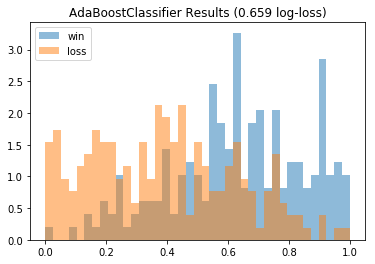

50 100


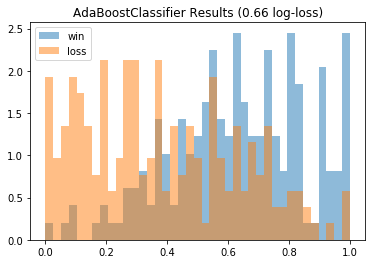

50 150


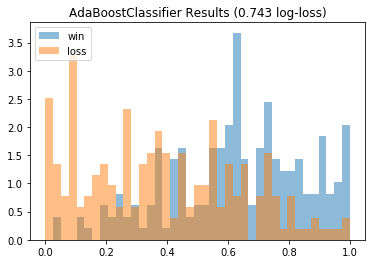

50 200


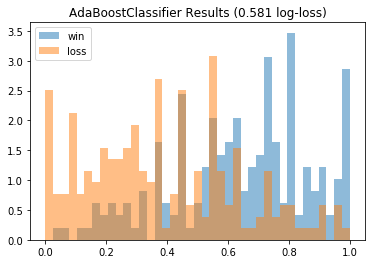

50 250


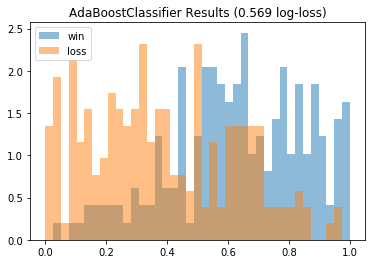

50 300


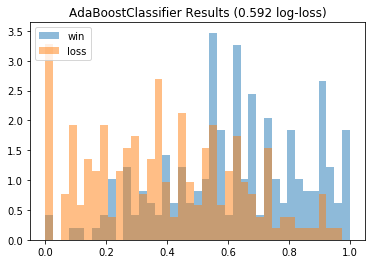

100 50


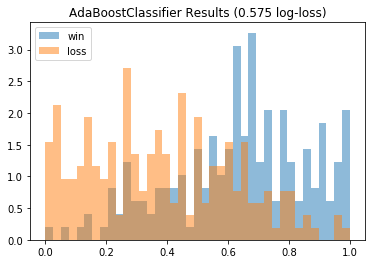

100 100


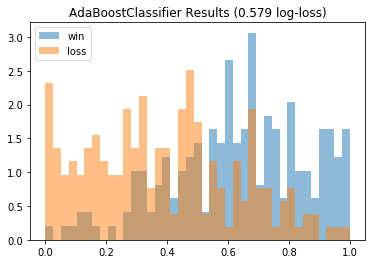

100 150


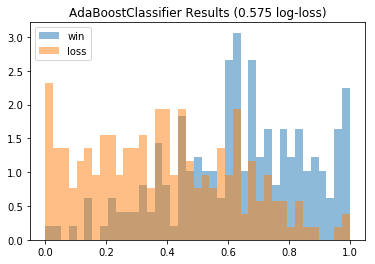

100 200


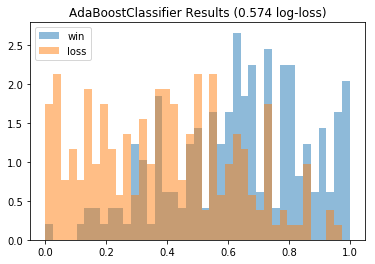

100 250


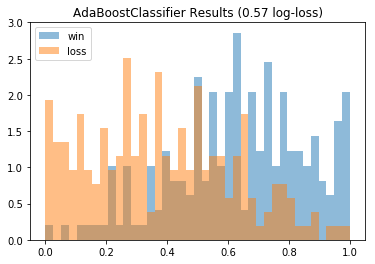

100 300


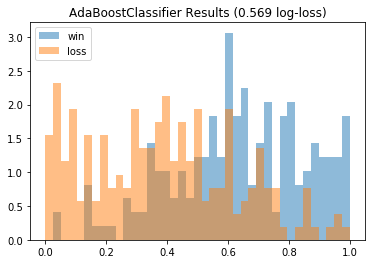

150 50


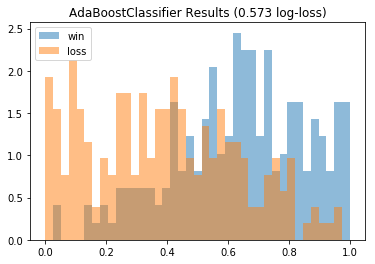

150 100


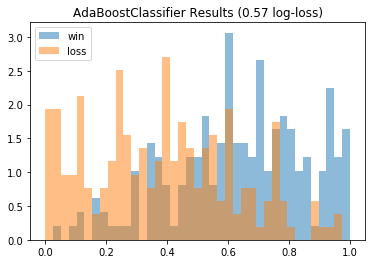

150 150


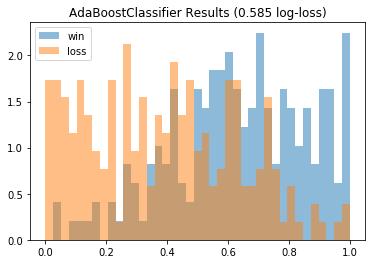

150 200


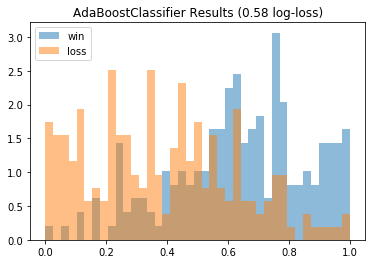

150 250


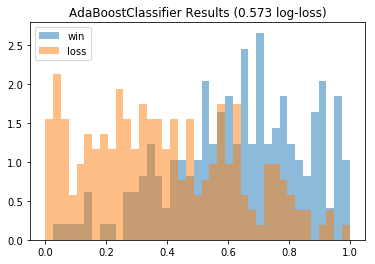

150 300


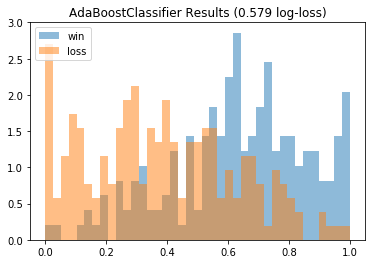

200 50


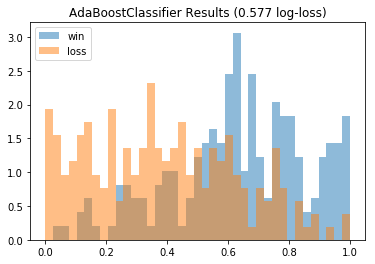

200 100


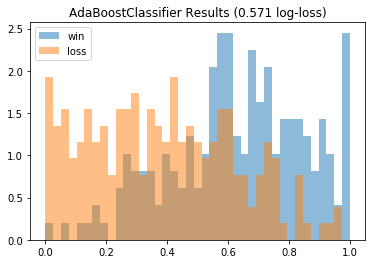

200 150


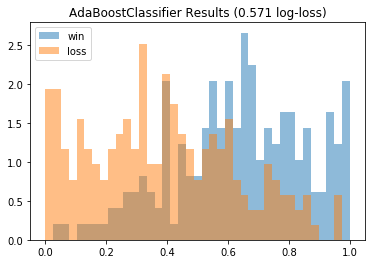

200 200


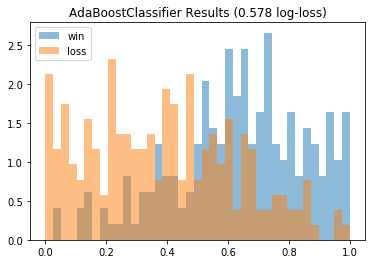

200 250


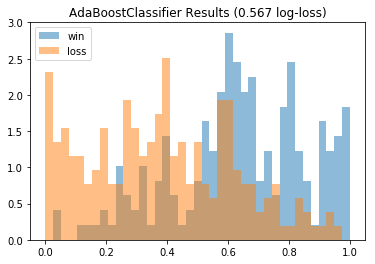

200 300


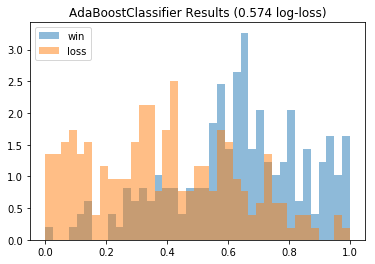

250 50


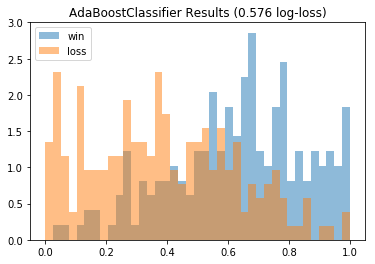

250 100


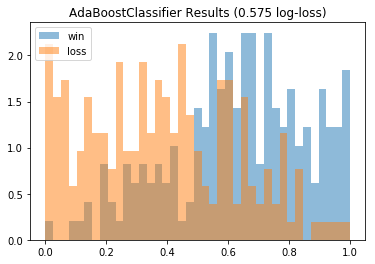

250 150


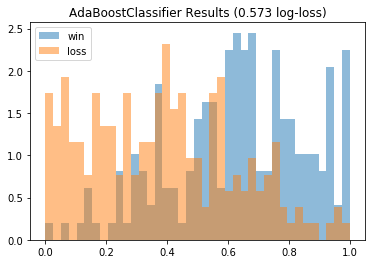

250 200


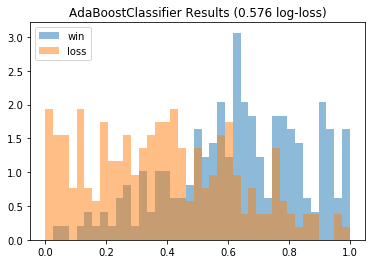

250 250


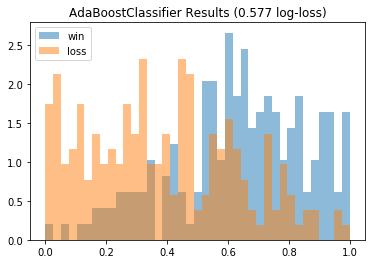

250 300


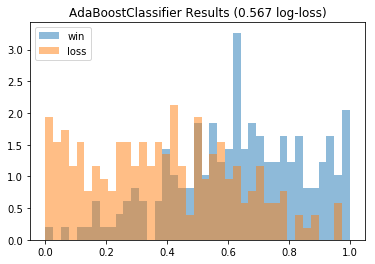

300 50


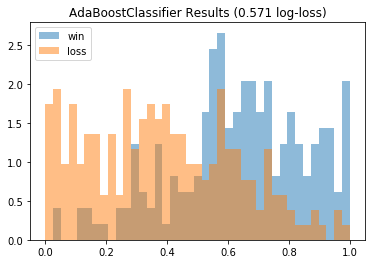

300 100


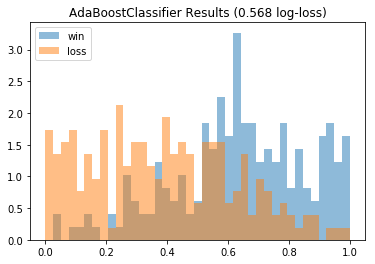

300 150


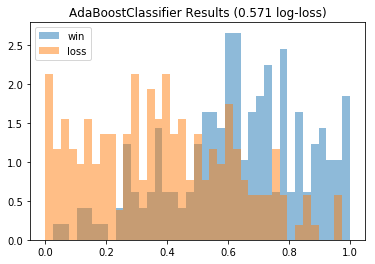

300 200


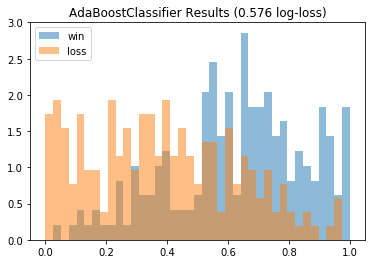

300 250


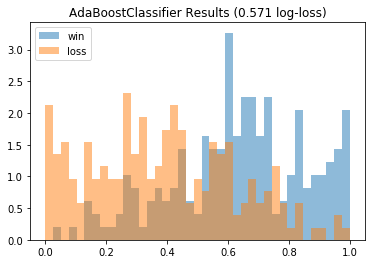

300 300


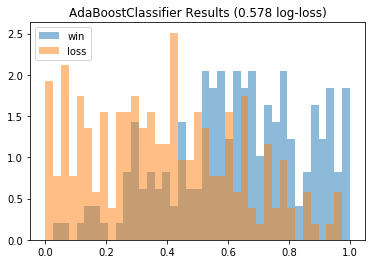

In [114]:
for i in [50, 100, 150, 200, 250, 300]:
    for j in [50, 100, 150, 200, 250, 300]:
        RF = RandomForestClassifier(n_estimators=i)
        Ada = AdaBoostClassifier(base_estimator=RF, n_estimators=j)
        print(i, j)
        fit_and_evaluate(Ada, X_col)

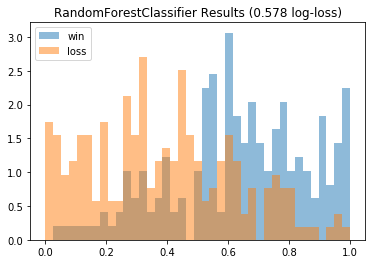

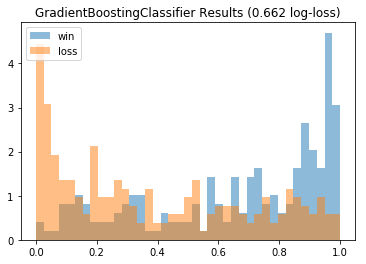

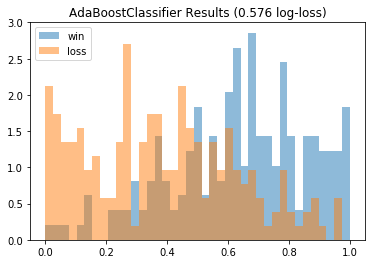

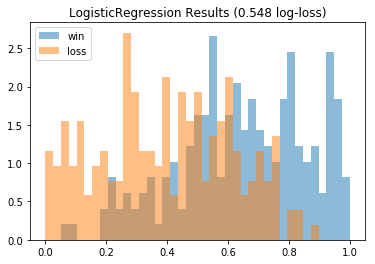

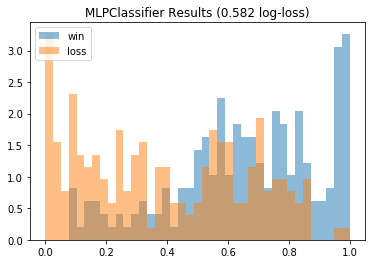

In [111]:
for i in [RF, GBT, Ada, LR, MLP]:
    fit_and_evaluate(i, X_col)